In [ ]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# pd.read_csv("/content/drive/MyDrive/dataset/aqi_daily_1980_to_2021.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the csv dataset
csv_loc = "/content/drive/MyDrive/dataset/aqi_daily_1980_to_2021.csv"
df = pd.read_csv(csv_loc)
df.head(5)

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter for Los Angeles, California
df_la = df[(df['State Name'] == 'California') & (df['County Name'] == 'Los Angeles')].sort_values('Date')
df_la.set_index('Date', inplace=True)

In [ ]:
# Check missing values
print(f"Missing AQI values: {df_la['AQI'].isnull().sum()}")
# Interpolate missing values
df_la['AQI'] = df_la['AQI'].interpolate()

Missing AQI values: 0


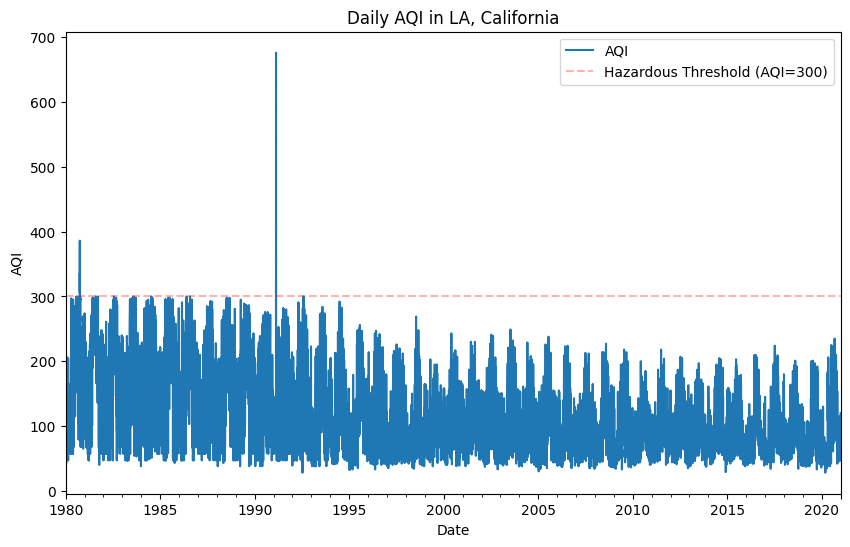

In [ ]:
# Plot AQI
df_la['AQI'].plot(figsize=(10, 6), title='Daily AQI in LA, California')
# Highlight hazardous days
plt.axhline(y=300, color='red', linestyle='--', alpha=0.3, label='Hazardous Threshold (AQI=300)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

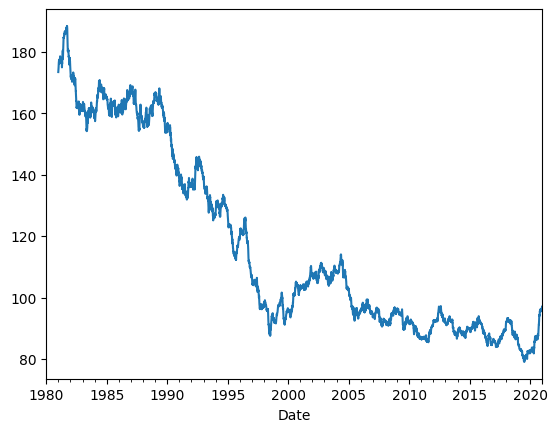

In [ ]:
df_la['AQI'].rolling(365).mean().plot()